# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices
### Jean Paul Barddal, M.Sc.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [32]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = prices.max()

# Mean price of the data
mean_price = prices.mean()

# Median price of the data
median_price = prices.median()

# Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** Without taking a look between the correlation of each attribute and the target variable, I would assume that:

   1- ** RM ** Bigger houses tend to have more rooms, and thus, their prices also tend to go up. Therefore, I believe that with the increase of RM, MDEV also would increase.
   
   2- **(LSTAT)** Bigger values of LSTAT mean that the homeowners of the neighborhood are not so wealthy in comparison to the others that reside in different neighbors. Having that in mind, I believe that with the increase of LSTAT that average value of MDEV would decrease. 
   
   3- **(PTRATIO)** Bigger values of PTRATIO mean that the ratio between students and techers is high. I might be wrong, but that might be an indicative of public schools in the area. Following this thought, I believe more public schools in the area would be an indication of low-income neighborhoods. I believe that higher values of PTRATIO would incur in lower values of MEDV.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [33]:
from sklearn.metrics import r2_score
### http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 
    # 'y_predict' using R^2 scoring operator
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

#### Visualization (To corroborate the hypotheses)

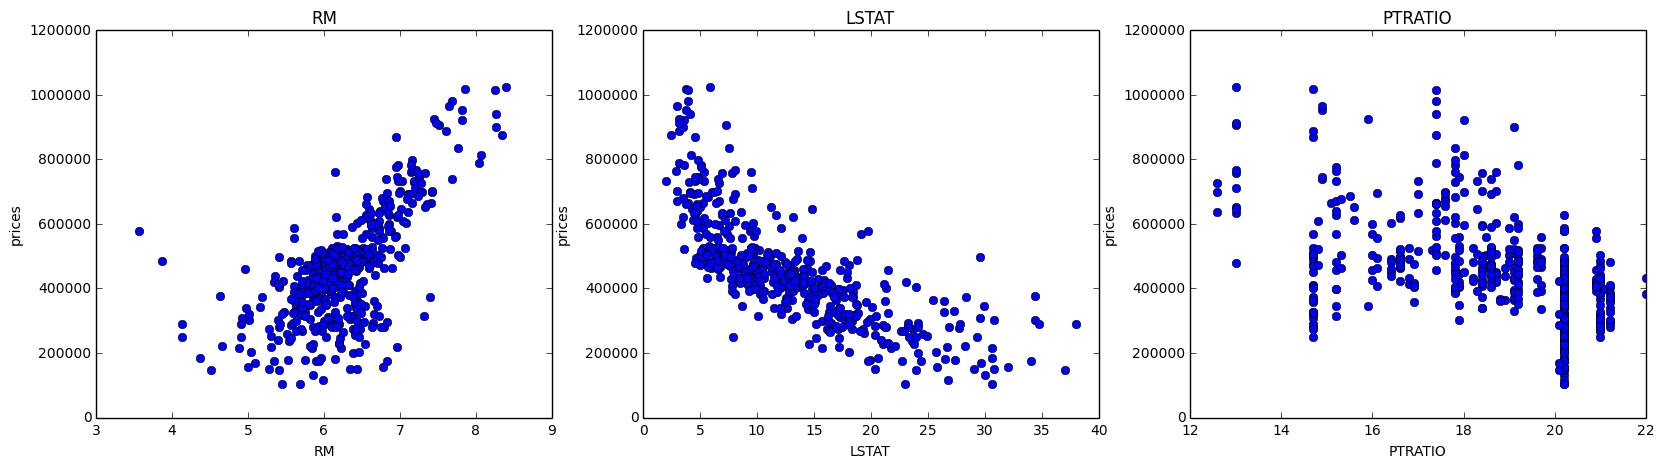

In [34]:
# pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# enumerate create a list of values in the (index, value) form, 
# where index = 0,1,...,n and 
# value is the value passed as a parameter

for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i + 1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

###### Discussion 
The hypotheses (1) and (2) are somewhat verified, however, the third one doesn't seem to show a linear correlation.

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [35]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** The $R^2$ score is bounded in the [0;1] interval, where $R^2=0$ means that the variables are completely uncorrelated and $R^2=1$ depicts complete correlation. Since the value obtained ($R^2=0.923$) is very close to $1$, both variables are strongly correlated. Nevertheless, one should always bear in mind that the tested data sample is very small and this test should not be used to draw any conclusions.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [36]:
from sklearn.cross_validation import train_test_split
#http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=15)

# Verifies if all the structures needed are correctly instantiated
if X_train is not None \
    and X_test is not None \
    and y_train is not None \
    and y_test is not None:
    print "Training and testing split was successful."
    print "Ratio between train and test data = {:,.2f}%, {:,.2f}%".format( \
        float(100 * X_train.shape[0]) / float(features.shape[0]), \
        float(100 * X_test.shape[0]) / float(features.shape[0]))
else:
    print "Error while training and testing split!!!"

Training and testing split was successful.
Ratio between train and test data = 79.96%, 20.04%


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** When working with machine learning, you must always evaluate your predictive model. The most naive approach to evaluate an algorithm is to both train and test your learner using the same data. This is problematic since a model is almost guaranteed to work well on data used for training, but the same cannot be said about unseen data. This is often referred as **overfitting**, which is the issue with learners not generalizing well. Therefore, you should always prefer testing your learner with unseen data. This can be performed in several ways: using holdout (where a percentage of the data set is solely used for testing), $k$ fold cross-validation (the data set is split into $k$ folds, and each fold is used to test the model created with the remaining folds), hold-one-out (the same as cross-validation, where each fold equals to a single record) or even Prequential, often used in streaming scenarios.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

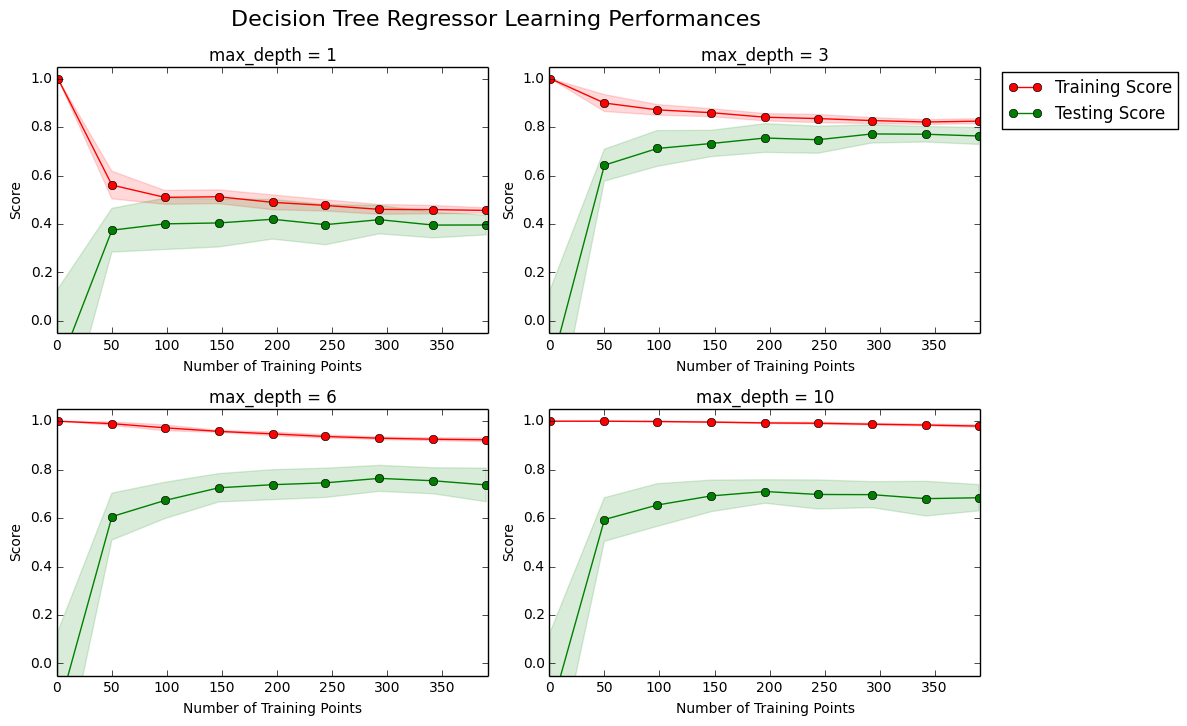

In [37]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
Starting with the first plot, i.e. $max\_depth=1$, we can verify that the testing score increases and converges into an approximate value close to 0.4 with the number of observations. This is a clear indication that the trained model does **not** generalize well for unseen data, i.e. is possesses high bias. On the other hand, with the addition of training points, the training score decreases and converges to almost the same value, which is a low one. This is also interesting since it show that the learned model does not fit the training data well, showing that $max\_depth=1$ is insufficient to learn anything from the data.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

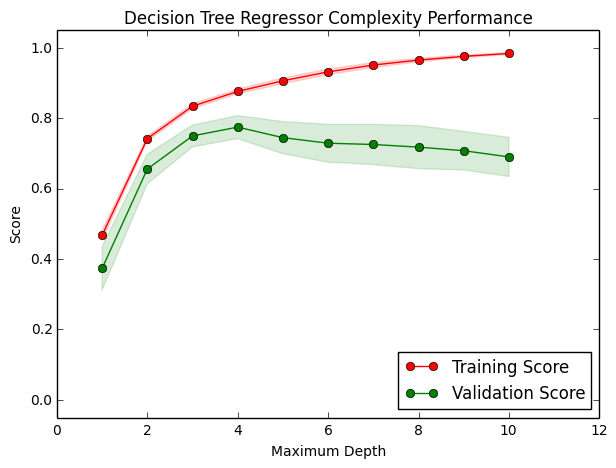

In [38]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**General comment: ** Identifying if a model suffers from high bias or high variance is quite simple. 

| High Bias       | High Variance |
| :-------------: | :--------:    |
| Models usually present a small or no gap between the trainig and validation scores | Models present a "gap" between the training and validation scores |

- Models with high variance possess bigger gaps between its' scores since if fits the training data well but does **not** generalizes well unseen data  (see $max\_depth=10$ results for an example of that)
- On the other hand, highly biased models present near zero gaps between the scores since it neither generalizes well for both training and test data sets, hence converging to a low score (see $max\_depth=1$ results for an example of that)

**Answer: ** When training with $max\_depth =1$, it follows that the model ends up showing a high bias, where both training and test scores are low and there is almost not gap between the score curves. Conversely, the results obtained by $max\_depth=1$ shows a high training score while the testing score is low. There is a fair gap between the curves, showing that the model fits the data set well, but does not generalize well for unseen data, and thus, it suffers from high variance.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** Following the results shown in the max\_depth plots above, I believe $max\_depth \in [4;6]$ would lead to an optimal model. The rationale behind my hypothesis is that, by interpolation, the gap between the training and testing curves would not be substantial and the testing scores would achieve a maximum.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Grid search is an algorithm that builds a grid with the parameters and the possible values for an algorithm that needs to be optimized. The rationale behind it is very simple: evaluate all the combinations of parameters for this algorithm with the goal of optimizing a single (or set of) metric(s), e.g. accuracy, precision, recall, mean square error (MSE), and so on. Sometimes evaluating all the combinations of parameters is nearly impossible due to the amount of combinations and that each of these combinations should generate and evaluate a learning model, and thus, randomized searching procedures are also often used, e.g. RandomizedSearchCV (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique and how is it performed on a learning algorithm?*

**Answer: ** $k$-fold cross-validation is a training method where the data set is split into $k$ folds of equal size. The idea is that each of these folds is used as the testing set for a model trained with the remaining $k-1$ folds. As a result, the testing performance can be averaged amongst all the $k$ results obtained. Performing $k$-fold cross-validation is beneficial since it is more reliable than a conventional train/test split by reducing the variance of a single run. Cross-validation should be used when performing grid search optimization since grid search would select parameter value combinations that perform very well on some specific train-test split and possibly poorly over unseen data. One of the main limitations of the cross-validation is when working with non-uniformly distributed data, as for instance, sorted data, e.g. time series and data streams. Nevertheless, the work of [1] presents an interesting way of combining Prequential and cross-validation schemes.

[1] https://melmeric.files.wordpress.com/2010/05/efficient-online-evaluation-of-big-data-stream-classifiers.pdf

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [39]:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
from sklearn.metrics import make_scorer
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    rangeMaxDepth = [x for x in range(1,11)]
    max_features = [x for x in range(1,4)] # bounded to a maximum of 3 since we have only 3 features
    splitters = ['best', 'random']
    criterions = ['mae', 'mse']
    
    # I took the liberty to increment the grid by adding some more attributes in here
    
    params = {'max_depth' : rangeMaxDepth, 'max_features': max_features,\
              'splitter': splitters, 'criterion': criterions}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [40]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The result obtained empirically was $4$, which was included in the guess provided as an answer to Question # 6. The optimal classifier parameters are:

In [41]:
reg.get_params()

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [42]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $338,625.00
Predicted selling price for Client 2's home: $220,556.76
Predicted selling price for Client 3's home: $823,200.00


**Answer: ** The values outputted by the learning algorithm seem reasonable. I believe some rounding should be performed, maybe achieving the values of \$338,500.00, \$220,500.00 and \$820,000.00, respectively. If we compare the data on the data exploration section, we can see that the values for houses 1 and 2 are below the mean and median prices. This is easily explained in the second house since it has few rooms, it is located in a low-income area and a high student/teacher ratio. The same rationale can be used to the first household, with the exception of the number of rooms, which might be determinant for the slightly higher price. Finally, the price for the third house is above both the mean and median, and somewhat near the maximum value present in the data set. This third property is expected to present higher value since has a lot of rooms, is located in a prosperous region of the city and has a reasonably small student/teacher ratio (at least it is smaller than the other listed properties here evaluated).

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [43]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $329,700.00
Trial 4: $324,450.00
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $394,800.00
Trial 8: $405,300.00
Trial 9: $326,550.00
Trial 10: $316,890.00

Range in prices: $109,531.58


** As stated earlier, the range in the output prices is quite high!!!**

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** I don't believe the model created in this project could be used in a real-world setting. The first reason is that the data set does not include critical data which is relevant to determine the value of a real estate, such as: crime rates in the neighborhood, distance to city center, public transport access and so on. Also, the data set used contains information about houses in the city of Boston, MA in 1978. This may lead to many problems, including: (i) the data set is biased to houses as they were back in 1978 and not nowadays in terms of number of rooms, square footage and etc, and (ii) the model is also biased to the real state prices in Boston, which might be a limitation since the prices may be very different from other cities inside or outside the US.
